Исходное изображение: 

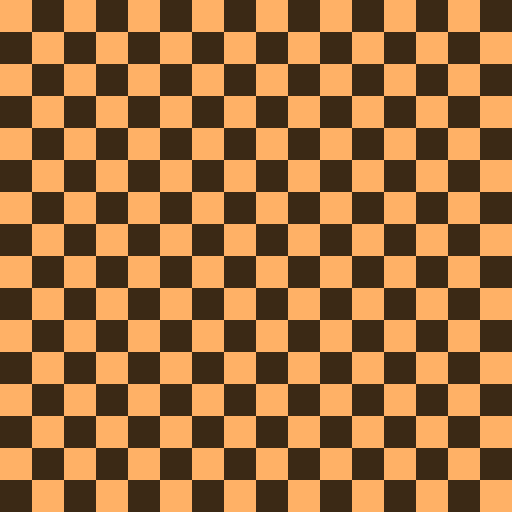

Изображение после конвертации туда-обратно: 

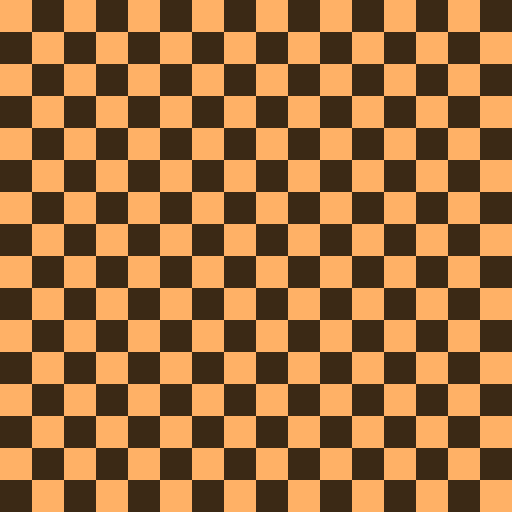

In [6]:
using Images

img_src = "images/checkerboard.png"

print("Исходное изображение: ")
img = Images.load(img_src)
display(img)

function convert2RGB(img)
    imgᵣ = float32.(img)
    r, g, b = [], [], []
    for pix in imgᵣ
        push!(r, convert(UInt32, red(pix)*255))
        push!(g, convert(UInt32, green(pix)*255))
        push!(b, convert(UInt32, blue(pix)*255))
    end
    return r, g, b
end

function convert2B(r, g, b)
    r = reshape(r, 4, length(r) ÷ 4)
    g = reshape(g, 4, length(g) ÷ 4)
    b = reshape(b, 4, length(b) ÷ 4)
    i = 0
    bitsₐ, bitsᵦ, bitsᵧ = [], [], []
    for i in range(1, size(r, 2))
        bit32 = view(r, :, i)
        push!(bitsₐ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(g, :, i)
        push!(bitsᵦ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(b, :, i)
        push!(bitsᵧ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bitsₐ, bitsᵦ, bitsᵧ
end

function convert2Q(bitsₐ, bitsᵦ, bitsᵧ)
    r, g, b = [], [], []
    mask = 0xff
    for bit32 in bitsₐ
        push!(r, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵦ
        push!(g, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵧ
        push!(b, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵣ = []
    i = 0
    for i in range(1, size(r, 1))
        push!(imgᵣ, RGB(r[i] / 255, g[i] / 255, b[i] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

r, g, b = convert2RGB(img)
bits₀, bits₁, bits₂ = convert2B(r, g, b)
print("Изображение после конвертации туда-обратно: ")
img₂ = convert2Q(bits₀, bits₁, bits₂)
display(img₂)

In [34]:
acm = [1 1; 1 2]

function norm(M)
    mask = 0x01ff
    x, y = 0, 0
    for x in range(1, size(M, 1))
        for y in range(1, size(M, 2))
            M[x, y] = M[x, y] & mask
        end
    end
    return M
end 

function bin_pow(A, x)
    if x == 1
        return A
    elseif x & 1 == 0
        B = bin_pow(A, x ÷ 2)
        return norm(B*B)
    else
        B = bin_pow(A, x - 1)
        return norm(A*B)
    end
end

function init_state()
    x = 0
    y = 0
    r = 1
    M_img = zeros(UInt16, 512*512, 2)
    for x in range(0, 511)
        for y in range(0, 511)
            M_img[r, 1] = x
            M_img[r, 2] = y
            r += 1
        end
    end
    return M_img
end

function shuffle(x)
    M = init_state()
    global acm = acm
    return norm(M*bin_pow(acm, x))
end

print(bin_pow(acm, 2))
print(bin_pow(acm, 4))
print("\n")
shuffle(128)

[2 3; 3 5][13 21; 21 34]


262144×2 Matrix{Int64}:
   0    0
  59  285
 118   58
 177  343
 236  116
 295  401
 354  174
 413  459
 472  232
  19    5
  78  290
 137   63
 196  348
   ⋮  
  90  105
 149  390
 208  163
 267  448
 326  221
 385  506
 444  279
 503   52
  50  337
 109  110
 168  395
 227  168

Исходное изображение: 

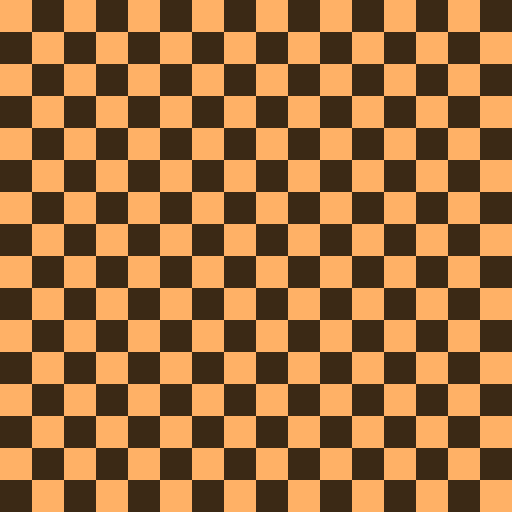

Изображение после преобразования: 

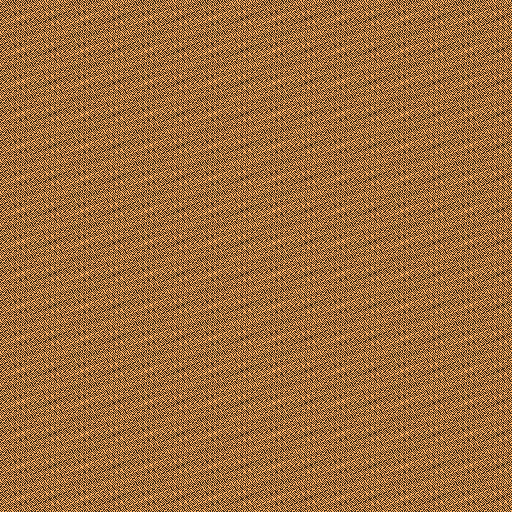

Изображение после обратного преобразования: 

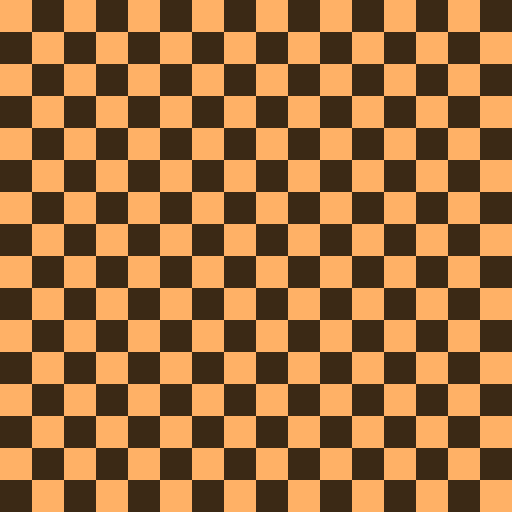

In [77]:
using Images

img_src = "images/checkerboard.png"

print("Исходное изображение: ")
img = Images.load(img_src)
display(img)

function convert2RGB(img)
    imgᵣ = float32.(img)
    r, g, b = [], [], []
    for pix in imgᵣ
        push!(r, convert(UInt32, red(pix)*255))
        push!(g, convert(UInt32, green(pix)*255))
        push!(b, convert(UInt32, blue(pix)*255))
    end
    r = reshape(r, 512, 512)
    g = reshape(g, 512, 512)
    b = reshape(b, 512, 512)
    return r, g, b
end

function convert2B(r, g, b)
    r = reshape(r, 4, length(r) ÷ 4)
    g = reshape(g, 4, length(g) ÷ 4)
    b = reshape(b, 4, length(b) ÷ 4)
    i = 0
    bitsₐ, bitsᵦ, bitsᵧ = [], [], []
    for i in range(1, size(r, 2))
        bit32 = view(r, :, i)
        push!(bitsₐ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(g, :, i)
        push!(bitsᵦ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(b, :, i)
        push!(bitsᵧ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bitsₐ, bitsᵦ, bitsᵧ
end

function convert2Q(bitsₐ, bitsᵦ, bitsᵧ)
    r, g, b = [], [], []
    mask = 0xff
    for bit32 in bitsₐ
        push!(r, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵦ
        push!(g, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵧ
        push!(b, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵣ = []
    i = 0
    for i in range(1, size(r, 1))
        push!(imgᵣ, RGB(r[i] / 255, g[i] / 255, b[i] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

r, g, b = convert2RGB(img)

acm = [1 1; 1 2]
acm⁻¹ = [2 511; 511 1]

function norm(M)
    mask = 0x01ff
    x, y = 0, 0
    for x in range(1, size(M, 1))
        for y in range(1, size(M, 2))
            M[x, y] = M[x, y] & mask
        end
    end
    return M
end 

function bin_pow(A, x)
    if x == 1
        return A
    elseif x & 1 == 0
        B = bin_pow(A, x ÷ 2)
        return norm(B*B)
    else
        B = bin_pow(A, x - 1)
        return norm(A*B)
    end
end

function init_state()
    x = 0
    y = 0
    r = 1
    M_img = zeros(UInt16, 512*512, 2)
    for x in range(0, 511)
        for y in range(0, 511)
            M_img[r, 1] = x
            M_img[r, 2] = y
            r += 1
        end
    end
    return M_img
end

function shuffle(x, b)
    M = init_state()
    global acm = acm
    M = norm(M*bin_pow(acm, x))
    bb = b[:, :]
    r, x, y = 1, 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            bb[x, y] = b[M[r, 1]+1, M[r, 2]+1]
            r += 1
        end
    end
    return bb
end

function un_shuffle(x, b)
    M = init_state()
    global acm⁻¹ = acm⁻¹
    M = norm(M*bin_pow(acm⁻¹, x))
    bb = b[:, :]
    r, x, y = 1, 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            bb[x, y] = b[M[r, 1]+1, M[r, 2]+1]
            r += 1
        end
    end
    return bb
end

print("Изображение после преобразования: ")
r = shuffle(1024, r)
g = shuffle(1024, g)
b = shuffle(1024, b)
bits₀, bits₁, bits₂ = convert2B(r, g, b)
img₂ = convert2Q(bits₀, bits₁, bits₂)
display(img₂)
print("Изображение после обратного преобразования: ")
r = un_shuffle(1024, r)
g = un_shuffle(1024, g)
b = un_shuffle(1024, b)
bits₀, bits₁, bits₂ = convert2B(r, g, b)
img₂ = convert2Q(bits₀, bits₁, bits₂)
display(img₂)

In [ ]:
using Images

img_src = "images/checkerboard.png"
open_key = "ztKJsz96vhtj7ZmZ9Z2fKk3mCjxD7gGM" #IV
secret_key = "4174317021-460291757-1431655765-1330207241" #KEY

print("Исходное изображение: ")
img = Images.load(img_src)
display(img)

function convert2RGB(img)
    imgᵣ = float32.(img)
    r, g, b = [], [], []
    for pix in imgᵣ
        push!(r, convert(UInt32, red(pix)*255))
        push!(g, convert(UInt32, green(pix)*255))
        push!(b, convert(UInt32, blue(pix)*255))
    end
    r = reshape(r, 512, 512)
    g = reshape(g, 512, 512)
    b = reshape(b, 512, 512)
    return r, g, b
end

function convert2B(r, g, b)
    r = reshape(r, 4, length(r) ÷ 4)
    g = reshape(g, 4, length(g) ÷ 4)
    b = reshape(b, 4, length(b) ÷ 4)
    i = 0
    bitsₐ, bitsᵦ, bitsᵧ = [], [], []
    for i in range(1, size(r, 2))
        bit32 = view(r, :, i)
        push!(bitsₐ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(g, :, i)
        push!(bitsᵦ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
        bit32 = view(b, :, i)
        push!(bitsᵧ, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bitsₐ, bitsᵦ, bitsᵧ
end

function convert2Q(bitsₐ, bitsᵦ, bitsᵧ)
    r, g, b = [], [], []
    mask = 0xff
    for bit32 in bitsₐ
        push!(r, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵦ
        push!(g, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    for bit32 in bitsᵧ
        push!(b, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵣ = []
    i = 0
    for i in range(1, size(r, 1))
        push!(imgᵣ, RGB(r[i] / 255, g[i] / 255, b[i] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

r, g, b = convert2RGB(img)

acm = [1 1; 1 2]
acm⁻¹ = [2 511; 511 1]

function norm(M)
    mask = 0x01ff
    x, y = 0, 0
    for x in range(1, size(M, 1))
        for y in range(1, size(M, 2))
            M[x, y] = M[x, y] & mask
        end
    end
    return M
end 

function bin_pow(A, x)
    if x == 1
        return A
    elseif x & 1 == 0
        B = bin_pow(A, x ÷ 2)
        return norm(B*B)
    else
        B = bin_pow(A, x - 1)
        return norm(A*B)
    end
end

function init_state()
    x = 0
    y = 0
    r = 1
    M_img = zeros(UInt16, 512*512, 2)
    for x in range(0, 511)
        for y in range(0, 511)
            M_img[r, 1] = x
            M_img[r, 2] = y
            r += 1
        end
    end
    return M_img
end

function shuffle(x, b)
    M = init_state()
    global acm = acm
    M = norm(M*bin_pow(acm, x))
    bb = b[:, :]
    r, x, y = 1, 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            bb[x, y] = b[M[r, 1]+1, M[r, 2]+1]
            r += 1
        end
    end
    return bb
end

function un_shuffle(x, b)
    M = init_state()
    global acm⁻¹ = acm⁻¹
    M = norm(M*bin_pow(acm⁻¹, x))
    bb = b[:, :]
    r, x, y = 1, 0, 0
    for x in range(1, 512)
        for y in range(1, 512)
            bb[x, y] = b[M[r, 1]+1, M[r, 2]+1]
            r += 1
        end
    end
    return bb
end

print("Изображение после преобразования: ")
r = shuffle(1024, r)
g = shuffle(1024, g)
b = shuffle(1024, b)
bits₀, bits₁, bits₂ = convert2B(r, g, b)
img₂ = convert2Q(bits₀, bits₁, bits₂)
display(img₂)

function convert2B(img)
    imgᵣ = float32.(img)
    imgᵢ = []
    for pix in imgᵣ
        push!(imgᵢ, convert(UInt32, red(pix)*255), convert(UInt32, green(pix)*255), convert(UInt32, blue(pix)*255))
    end
    imgᵢ = reshape(imgᵢ, 4, length(imgᵢ) ÷ 4)
    i = 0
    bits = []
    for i in range(1, size(imgᵢ, 2))
        bit32 = view(imgᵢ, :, i)
        push!(bits, bit32[1] << 24 + bit32[2] << 16 + bit32[3] << 8 + bit32[4])
    end
    return bits
end

function convert2Q(bits)
    imgᵢ = []
    mask = 0xff
    for bit32 in bits
        push!(imgᵢ, (bit32 >>> 24) & mask, (bit32 >>> 16) & mask, (bit32 >>> 8) & mask, bit32 & mask)
    end
    imgᵢ = reshape(imgᵢ, 3, length(imgᵢ) ÷ 3)
    imgᵣ = []
    i = 0
    for i in range(1, size(imgᵢ, 2))
        rgb = view(imgᵢ, :, i)
        push!(imgᵣ, RGB(rgb[1] / 255, rgb[2] / 255, rgb[3] / 255))
    end
    imgᵣ = reshape(imgᵣ, 512, 512)
    img = n0f8.(imgᵣ)
    return img
end

mask = 0xffffffff

function hash1(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in str
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash2(str)
    global mask = mask
    h = convert(UInt32, 0)
    for c in reverse(str)
        h = 17*h + 3*codepoint(c)
        h &= mask
    end
    return h
end

function hash3(str)
    h = convert(UInt32, 0)
    for c in str
        h = h ⊻ codepoint(c)
    end
    return h << 24 + h << 16 + h << 8 + h
end

function hash4(str)
    h = convert(UInt32, 0)
    for c in SubString(str, 1:8)
        h = h ⊻ codepoint(c)
    end
    for c in SubString(str, 9:16)
        h = h ⊻ (codepoint(c) << 8)
    end
    for c in SubString(str, 17:24)
        h = h ⊻ (codepoint(c) << 16)
    end
    for c in SubString(str, 25:32)
        h = h ⊻ (codepoint(c) << 24)
    end
    return h
end

state = 0xffffffffffffffffffffffffffffffff

function set_state_op(key)
    global state = convert(UInt128, hash1(key)) << 96 + convert(UInt128, hash2(key)) << 64 + convert(UInt128, hash3(key)) << 32 + hash4(key)
end

function set_state_sc(key)
    i1, i2, i3, i = -1, -1, -1, 0
    for i in range(1, length(key))
        if key[i] == '-'
            if i1 == -1
                i1 = i
            elseif i2 == -1
                i2 = i
            else
                i3 = i
            end
        end
    end
    h1 = SubString(key, 1, (i1-1))
    h2 = SubString(key, (i1+1), (i2-1))
    h3 = SubString(key, (i2+1), (i3-1))
    h4 = SubString(key, (i3+1), (length(key)))
    global state = parse(UInt128, h1) << 96 + parse(UInt128, h2) << 64 + parse(UInt128, h3) << 32 + parse(UInt128, h4)
end

function next_state()
    global state = state
    mask = 0xffffffff
    bit32₀ = state & mask
    bit32₁ = (state & (mask << 32)) >>> 32
    bit32₂ = (state & (mask << 64)) >>> 64
    bit32₃ = (state & (mask << 96)) >>> 96

    temp₁ = bit32₃
    temp₁ = temp₁ ⊻ (temp₁ << 11)
    temp₁ = temp₁ ⊻ (temp₁ >>> 8)
    
    temp₂ = bit32₀
    
    bit32₃ = bit32₂
    bit32₂ = bit32₁
    bit32₁ = bit32₀
    bit32₀ = temp₁ ⊻ temp₂ ⊻ (temp₂ >>> 19)
    state = bit32₃ << 24 + bit32₂ << 16 + bit32₁ << 8 + bit32₀
    return bit32₀
end

function encrypt(bits, key)
    set_state_op(key)
    cipher = []
    for bit in bits
        γ = next_state()
        push!(cipher, γ ⊻ bit)
    end
    return cipher
end

function decrypt(cipher, key)
    set_state_sc(key)
    bits = []
    for bit in cipher
        γ = next_state()
        push!(bits, γ ⊻ bit)
    end
    return bits
end

bits₀, bits₁, bits₂ = convert2B(r, g, b)


ciph_0 = encrypt(bits₀, open_key)
ciph_1 = encrypt(bits₁, open_key)
ciph_2 = encrypt(bits₂, open_key)
enc_img = convert2Q(ciph_0, ciph_1, ciph_2)
print("Зашифрованное изображение: ")
display(enc_img)

bits₀ = decrypt(ciph_0, secret_key)
bits₁ = decrypt(ciph_1, secret_key)
bits₂ = decrypt(ciph_2, secret_key)
dec_img = convert2Q(r, g, b)
print("Расшифрованное изображение: ")
display(dec_img)

print("Изображение после обратного преобразования: ")
r, g, b = convert2RGB(dec_img)
r = un_shuffle(1024, r)
g = un_shuffle(1024, g)
b = un_shuffle(1024, b)
bits₀, bits₁, bits₂ = convert2B(r, g, b)
img₂ = convert2Q(bits₀, bits₁, bits₂)
display(img₂)

function saveImg(enc, dec)
    global img_src = img_src
    i = 1
    while img_src[i] != '.'
        i += 1
    end
    print("Зашифрованное изображение сохранено в ")
    print(string(SubString(img_src, 1, i-1), "_enc.png\n"))
    print("Расшифрованное изображение сохранено в ")
    print(string(SubString(img_src, 1, i-1), "_dec.png\n"))
    save(string(SubString(img_src, 1, i-1), "_enc.png"), enc)
    save(string(SubString(img_src, 1, i-1), "_dec.png"), dec)
end

saveImg(enc_img, dec_img)